# Classification of digits with scikit-learn

Example adapted from the official documentation

Author: Umberto Michelucci, TOELT LLC

In [1]:
# matplotlib is a library to plot all sort of data
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In ```scikit-learn``` there are several datasets available for trying out features. They are in the package ```datasets```. In this example we load the digits dataset. That is a low-resolution version of the MNIST dataset.

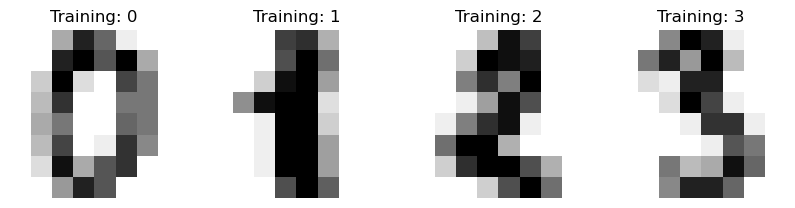

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
digits.images.shape

(1797, 8, 8)

In [4]:
# We check the datatype of digits.images
type(digits.images)

numpy.ndarray

The ```shape``` properties of a ```numpy``` array gives you the dimensions and the number of elements along each axis.

# Data Preparation

In this example, we will use a support vector classifier. This kind of model does not understand 2D data structures (as images are), and thus we need to flatten the images. The original dataset are ```8x8``` in size. 

In [5]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [6]:
data.shape

(1797, 64)

after flattening the 2D image has been converted to a one-dimensional vector with 64 elements (8x8).

# Train the model

In the next cell you can see a good example of the **hold-out** approach to model validation. You will learn more about it in one of the next lectures.

In [7]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
# This is an example of the hold-out approach for
# model validation.
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)


SVC(gamma=0.001)

After splitting the datasets we now have two: a train and a test portion. We can easily check their shapes.

In [8]:
print("Train set shape: ", X_train.shape)
print("Test set shape: ", X_test.shape)

Train set shape:  (898, 64)
Test set shape:  (899, 64)


# Evaluate the model on the test dataset

In [9]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

# Show the prediction visually

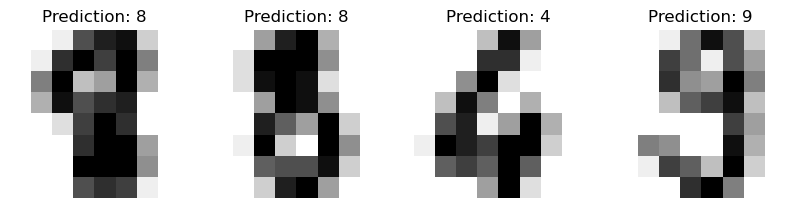

In [10]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

## Other useful features of ```scikit-learn```

In [11]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


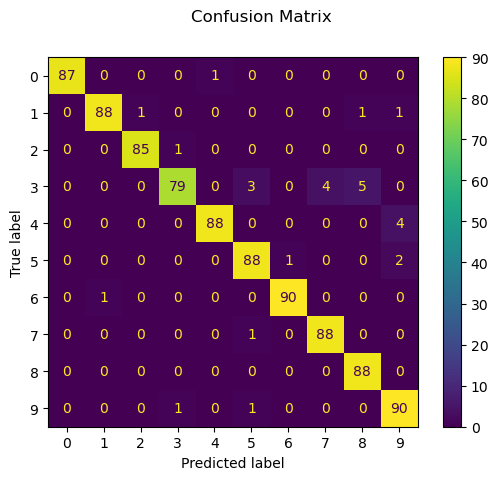

In [12]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()